# Popular languages

From post https://dev.to/aspittel/why-is-your-preferred-programming-language-your-go-to-345c

In [1]:
import re
import IPython
from collections import defaultdict

In [2]:
languages = [
    ['c',],
    ['c++',],
    ['python',],
    ['java',],
    ['javascript', 'js'],
    ['ruby',],
    ['crystal',],
    ['elixir',],
    ['go', 'golang'],
    ['rust',],
    ['c',],
    ['php',],
    ['perl',],
    ['asm', 'masm', 'fasm'],
    ['vb',],
    ['kotlin',],
    ['closure',],
    ['haskel',],
]

In [3]:
items = []
with open('data.txt') as f:
    s = f.read()
    items = s.split('Github logo')

In [4]:
total_counts = defaultdict(lambda: 0, {})

for item in items:
    words = re.compile(r"[^a-zA-Z-0-9#+-]+").split(item.lower())
    for lang in languages:
        for l in lang: # because each language has multiple definitions
            total_counts[lang[0]] += len([1 for w in words if w == l])

Text(0.5, 1.0, 'Language counts')

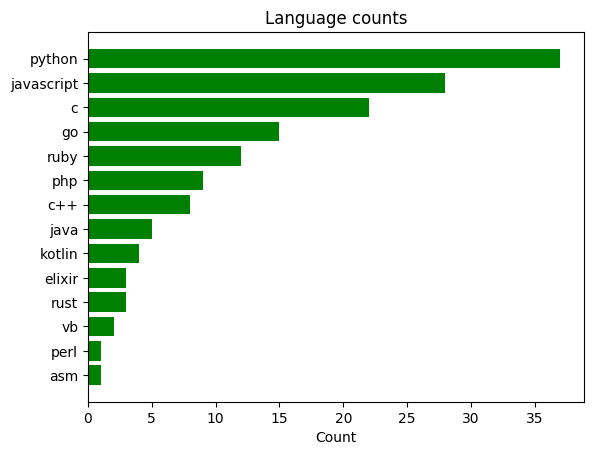

In [17]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcdefaults()
fig, ax = plt.subplots()

langs = [lang for lang in total_counts.keys() if total_counts[lang] > 0]
langs = sorted(langs, key=lambda x: total_counts[x], reverse=True)

y_pos = np.arange(len(langs))
counts = [total_counts[lang] for lang in langs]

ax.barh(y_pos, counts, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(langs)
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_title('Language counts')